In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
xtrain=pd.read_csv('fashion-mnist_train.csv')
xtest=pd.read_csv('fashion-mnist_test.csv')

In [3]:
# five elements from the top for training data
xtrain.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# five elements from the top for test data
xtest.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


C:\Users\ankit\anaconda3\envs\tf_gpu\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


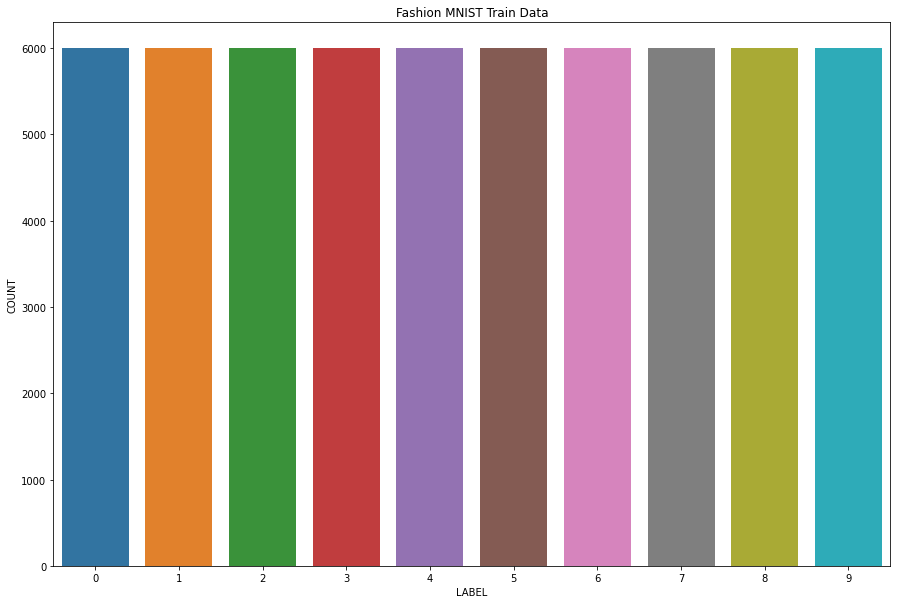

In [5]:
# checking for balanced training data
plt.figure(figsize=(15,10))
sns.countplot(xtrain['label'])
plt.title('Fashion MNIST Train Data')
plt.ylabel('COUNT')
plt.xlabel('LABEL')
plt.show()

C:\Users\ankit\anaconda3\envs\tf_gpu\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


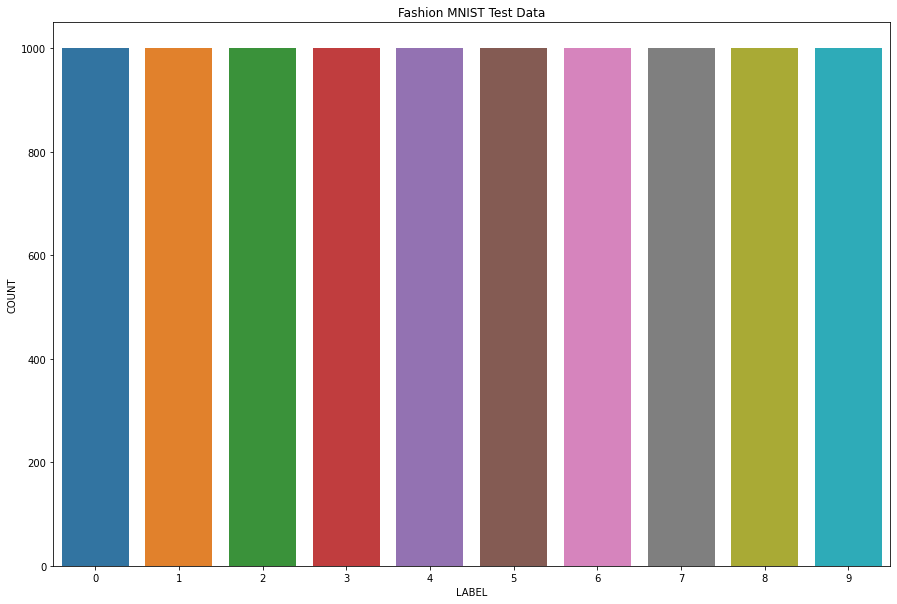

In [6]:
# checking for balanced test data
plt.figure(figsize=(15,10))
sns.countplot(xtest['label'])
plt.title('Fashion MNIST Test Data')
plt.ylabel('COUNT')
plt.xlabel('LABEL')
plt.show()

**Both training and test dataset is balanced.**

In [7]:
ytrain=xtrain['label']
xtrain=xtrain.drop(labels=['label'],axis=1)
ytest=xtest['label']
xtest=xtest.drop(labels=['label'],axis=1)
print(xtrain.shape,ytrain.shape)
print(xtest.shape,ytest.shape)

(60000, 784) (60000,)
(10000, 784) (10000,)


In [8]:
# normalising the data
xtrain=xtrain/255.0
xtest=xtest/255.0

In [9]:
# Reshaping the image in 3 dimensions (height = 28px, width = 28px , channel = 1)
xtrain = xtrain.values.reshape(-1,28,28,1)
xtest = xtest.values.reshape(-1,28,28,1)

In [10]:
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
ytrain = to_categorical(ytrain, num_classes = 10)
ytest=to_categorical(ytest,num_classes=10)

In [11]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator

In [12]:
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',input_shape=(28,28,1)))
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform'))
model.add(MaxPool2D(pool_size=(2,2),padding="same"))
model.add(Dropout(0.25))
model.add(Conv2D(64,(5,5),activation='relu',kernel_initializer='he_uniform'))
model.add(Conv2D(64,(5,5),activation='relu',kernel_initializer='he_uniform'))
model.add(MaxPool2D(pool_size=(2,2),padding="same"))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10,activation="softmax"))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 64)          51264     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 64)          102464    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 2, 2, 64)          0

In [14]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=['accuracy'])